In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

In [9]:
# Certifique-se de ter as stopwords baixadas
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charlley.jabbar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Carregar dados do Excel ----- 
# Nota LEMBRE DE SUBSTITUIR ESTA ROTA COM A ROTA DO EXCEL DESEJADO, 
# Neste excel necessita ter 2 colunas sendo elas nomeadas respectivamente CONCEITO e JUSTIFICATIVA.

df = pd.read_excel('[EXCEL FILE ROUTE over here]', engine='openpyxl') 

In [1]:
# FILTER Collumns based condition (in this case where Conceito = 5 and JUSTIFICATIVA not NULL)
# Filtrar linhas onde CONCEITO é '5' e tratar valores nulos na coluna JUSTIFICATIVA
df_filtrado = df[df['CONCEITO'] == 5].dropna(subset=['JUSTIFICATIVA'])

NameError: name 'df' is not defined

In [12]:
# Função para limpeza de texto
def limpar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto.lower())  # remover pontuação e converter para minúsculas
    palavras = texto.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stopwords.words('portuguese')]
    return ' '.join(palavras_filtradas)

In [13]:
# Aplicar limpeza de texto
df_filtrado['JUSTIFICATIVA_LIMPA'] = df_filtrado['JUSTIFICATIVA'].apply(limpar_texto)

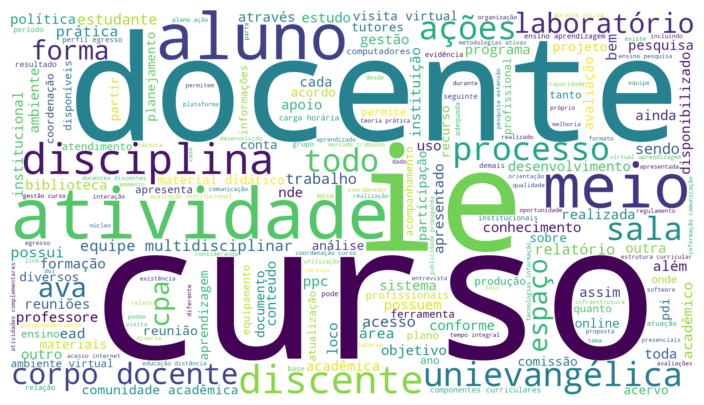

curso           810
atividades      415
ies             408
docentes        344
docente         326
aprendizagem    313
ppc             296
avaliação       279
discentes       272
equipe          266
dtype: int64


In [45]:

# Verificar se há palavras após a limpeza
if df_filtrado['JUSTIFICATIVA_LIMPA'].empty:
    print("Não há palavras após a limpeza do texto, provavelmente as regras de limpeza podem ter deletado, as palavras.")
else:
    # Contar frequência das palavras
    texto_total = ' '.join(df_filtrado['JUSTIFICATIVA_LIMPA'])
    palavras_frequencia = pd.Series(texto_total.split()).value_counts()

    # Gerar Wordcloud, SELECIONE O TAMANHO DA IMAGEM E COR DE FUNDO, passe a coletânea de palavras à serem geradas
    wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(texto_total)

    # Plotar Wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # Exibir as 10 palavras mais frequentes para análise técnica
    print(palavras_frequencia.head(10))

In [35]:
# Criar um DataFrame(célula) com as palavras e suas contagens
df_resultado = pd.DataFrame({'Palavra': palavras_frequencia.index, 'Contagem': palavras_frequencia.values})

# Salvar o DataFrame em um arquivo Excel
df_resultado.to_excel('resultado_wordcloud.xlsx', index=False)

# Confirmar que o arquivo foi salvo
print("Arquivo 'resultado_wordcloud.xlsx' salvo com sucesso!")


Arquivo 'resultado_wordcloud.xlsx' salvo com sucesso!
